In [ ]:
# Student: Carlos Arevalo (caeareva)
# Griou: None
# BME160 Final Project 
# Section: Sequence Alignment Analysis

# Reference: Biopython 
# Note: Jalview sotfware provides a visualization of the sequences alignment 
# and what mutations make each sequence different from the others.

# Clustalw

In [ ]:
# Install package
# conda install -c biobuilds clustalw 
# import Bio

# ORF S Alignment

Alignmet analysis of the ORF S- spike protein sequences. This is a example of subgenomic RNAs and structural proteins 
analysis from the virus genomes.

In [16]:
from Bio import AlignIO

#   contains the alinment results from Clustal Omega
file = "ORFS.aln"
format = "clustal"
align = AlignIO.read("ORFS.aln", "clustal")
print(align)


SingleLetterAlphabet() alignment with 4 rows and 1703 columns
--------------------------------------------...HYT SARSCoV2_S
MIALHLQTLNFCLLTEVFITQMIFLGLMSCIYKITFYLLTLMSL...--- BtRsBetaCoV_S
MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ...--- Rs4231_S
MMFKLLITLNILHLG-GFTILMKFLDQTLFILRIYFFHFILMLQ...--- CoV_U_S


# ORF S Phylogenic  Tree


Distance Matrix
SARSCoV2_S	0
BtRsBetaCoV_S	0.9036993540810334	0
Rs4231_S	0.9072225484439225	0.14503816793893132	0
CoV_U_S	0.9060481503229595	0.14856136230182027	0.12448620082207873	0
	SARSCoV2_S	BtRsBetaCoV_S	Rs4231_S	CoV_U_S


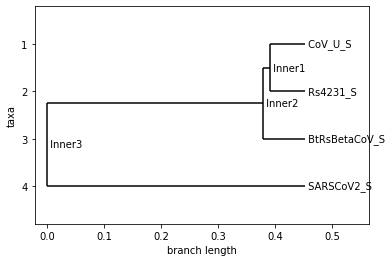

In [17]:
# Import modules
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)

# Print the distance Matrix
print('\nDistance Matrix\n===================')
print(dm)

# Construct the phylogenetic tree using UPGMA algorithm
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

# Draw the phylogenetic tree
Phylo.draw(tree)


In [18]:
# Visualization of protein sequences alignment using dot a plot 
# Method from biopython and midofied for this analysis 

import sys

def createMatrix(nrows, ncols):
    """Create a matrix of amino acid sequences to compare"""
    matrix = []
    # assign number of rows
    for index in range(nrows):
        matrix.append([])
        # assign number of columns 
        for line in range(ncols):
            matrix[index].append(0)
    
    return matrix

def dotplot(sequence1, sequence2):
    """Takes matrix and assigns to length of amino acid sequence"""
    matrix = createMatrix(len(sequence1), len(sequence2))
    # takes the length of first sequence
    for char in range(len(sequence1)):
        # takes the length of second sequence
        for nuc in range(len(sequence2)):
            # align both sequences
            if sequence1[char] == sequence2[nuc]:
                # makes nucleotides equal 1 for plot alignment
                matrix[char][nuc] = 1
    
    return matrix

def printDotPlot(matrix, seq1, seq2):
    """print dot plot in stdout """
    # print method: stdout
    sys.stdout.write(" " + seq2 + "\n")
    for index in range(len(matrix)):
        sys.stdout.write(seq1[index])
        for char in range(len(matrix[index])):
            if matrix[index][char] >= 1:
                sys.stdout.write("*")
            else:
                sys.stdout.write(" ")
        
        sys.stdout.write("\n")


In [10]:
# This main() will output a bloxplot with background noise 

# Input sequences can be a fragment from the proteins alignment you want to visualize
# Input sequences examples: 
#
#       Rs4231_S = MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ
#       BtRsBetaCoV_S = MIALHLQTLNFCLLTEVFITQMIFLGLMSCIYKITFYLLTLMSL


def main():
    """Takes sequences and executes program"""
    # Enter first sequence 
    sequence1 = input("Enter sequence 1: ")
    # Entern second sequence
    sequence2 = input("Enter sequence 2: ")
    # call matrix 
    matrix1 = dotplot(sequence1, sequence2)
    # call print dot plot
    printDotPlot(matrix1, sequence1, sequence2)
    
if __name__ == "__main__":
    main()   



Enter sequence 1: MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ
Enter sequence 2: MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ
 MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ
M**                   *                   *  
M**                   *                   *  
F  *              *           *     **       
K   *                  *                     
P    *        *                              
L     *  *  *        *   *   *  *        *   
I      *           **          *  *     *    
T       *  *                *                
L     *  *  *        *   *   *  *        *   
N         *                                  
T       *  *                *                
L     *  *  *        *   *   *  *        *   
H            *                        *      
P    *        *                              
G              * *                           
E               *                            
G              * *                           
F  *              *           *     **       


In [14]:
# This main() will clean and output a bloxplot without background noise 

# Input sequences can be a fragment from the proteins alignment you want to visualize
# Input sequences examples: 
#
#       Rs4231_S = MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ
#       BtRsBetaCoV_S = MIALHLQTLNFCLLTEVFITQMIFLGLMSCIYKITFYLLTLMSL

def filterDotPlot(sequence1, sequence2, window, stringency):
    """Method gets rid of backgourn noise in previous graph plot"""
    # create matrix of sequences alignment 
    matrix = createMatrix(len(sequence1), len(sequence2))
    start = int(window/2)
    # take the position of each amino acid in sequence 1
    for index in range(start, len(sequence1)-start):
        # take the position of each amino acid in sequence 2
        for position in range(start, len(sequence2)-start):
            matches = 0
            line = position - start
            # create matrix and matches aminos
            for item in range(index-start, index + start + 1):
                # align sequence if same amino is found
                if sequence1[item] == sequence2[line]: 
                    matches += 1
                    line += 1
                    if matches >= stringency:
                        # makes nucleotides equal 1 for plot alignment
                        matrix[index][pos] = 1
                        
    return matrix

def main():
    """Takes sequences and executes program"""
    # Enter first sequence 
    sequence1 = input("Enter sequence 1: ")
    # Entern second sequence
    sequence2 = input("Enter sequence 2: ")
    # call matrix 
    matrix2 = filterDotPlot(sequence1, sequence2, 5, 4)
    # print plot
    printDotPlot(matrix2, sequence1, sequence2)
    
if __name__ == "__main__":
    main()   


Enter sequence 1: MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ
Enter sequence 2: MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ
 MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ
M                                            
M                                            
F  **                                        
K   **                                       
P    **                                      
L     **                                     
I      **                                    
T       **                                   
L        **                                  
N         **                                 
T          **                                
L           **                               
H            **                              
P             **                             
G              **                            
E               **                           
G                **                          
F                 **                         


# ORF1a Alignment

Alignment analysis of the ORF1a encoding the nonstructural protein ORF1a polyprotein.
This is a example of the genomic RNAs analysis.

In [19]:
from Bio import AlignIO

# ORF1a contains the alinment results from Clustal Omega
file = "ORF1a.aln"
format = "clustal"
alignment = AlignIO.read("ORF1a.aln", "clustal")
print(align)



SingleLetterAlphabet() alignment with 4 rows and 1703 columns
--------------------------------------------...HYT SARSCoV2_S
MIALHLQTLNFCLLTEVFITQMIFLGLMSCIYKITFYLLTLMSL...--- BtRsBetaCoV_S
MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ...--- Rs4231_S
MMFKLLITLNILHLG-GFTILMKFLDQTLFILRIYFFHFILMLQ...--- CoV_U_S


# ORF1a Polyprotein Phylogenic Three


Distance Matrix
Rs4231	0
CoV_U	0.09642193308550184	0
SARSCoV2	0.5485594795539033	0.5587825278810409	0
ratG13	0.5652881040892193	0.5518122676579926	0.1189591078066915	0
	Rs4231	CoV_U	SARSCoV2	ratG13


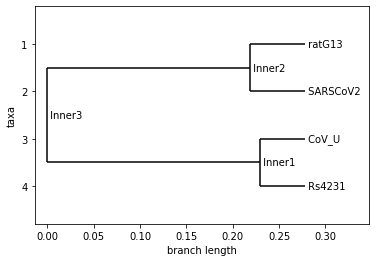

In [5]:
# Import modules
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

# Print the distance Matrix
print('\nDistance Matrix\n===================')
print(dm)

# Construct the phylogenetic tree using UPGMA algorithm
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

# Draw the phylogenetic tree
Phylo.draw(tree)


# Dotplot of Alignment 

In [21]:
# This main() will clean and output a bloxplot without background noise 

# Input sequences can be a fragment from the proteins alignment you want to visualize
# Input sequences examples: 
#
#       Rs4231_S = MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ
#       BtRsBetaCoV_S = MIALHLQTLNFCLLTEVFITQMIFLGLMSCIYKITFYLLTLMSL

def filterDotPlot(sequence1, sequence2, window, stringency):
    """Method gets rid of backgourn noise in previous graph plot"""
    # create matrix of sequences alignment 
    matrix = createMatrix(len(sequence1), len(sequence2))
    start = int(window/2)
    # take the position of each amino acid in sequence 1
    for index in range(start, len(sequence1)-start):
        # take the position of each amino acid in sequence 2
        for position in range(start, len(sequence2)-start):
            matches = 0
            line = position - start
            # create matrix and matches aminos
            for item in range(index-start, index + start + 1):
                # align sequence if same amino is found
                if sequence1[item] == sequence2[line]: 
                    matches += 1
                    line += 1
                    if matches >= stringency:
                        # makes nucleotides equal 1 for plot alignment
                        matrix[index][position] = 1
                        
    return matrix

def main():
    """Takes sequences and executes program"""
    # Enter first sequence 
    sequence1 = input("Enter sequence 1: ")
    # Entern second sequence
    sequence2 = input("Enter sequence 2: ")
    # call matrix 
    matrix2 = filterDotPlot(sequence1, sequence2, 5, 4)
    # print plot
    printDotPlot(matrix2, sequence1, sequence2)
    
if __name__ == "__main__":
    main()   




Enter sequence 1: MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ
Enter sequence 2: MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ
 MMFKPLITLNTLHPGEGFIILMKSLDQTLFILRIYFFHSILMSQ
M                                            
M                                            
F  **                                        
K   **                                       
P    **                                      
L     **                                     
I      **                                    
T       **                                   
L        **                                  
N         **                                 
T          **                                
L           **                               
H            **                              
P             **                             
G              **                            
E               **                           
G                **                          
F                 **                         
